## Text Preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi

In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\WINDOWS
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\WINDOWS
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data=pd.read_csv("data_tweet.csv")
text=data['text']

In [4]:
text

0       banyak diskon non, yuk merapat @gopayindonesia...
1       @gojekindonesia Keterlaluan dan kuno banget in...
2       @gopayindonesia saya sudah DM tolong dibantu d...
3       @gopayindonesia tolong ya min, dana saya sudah...
4       @gopayindonesia maximum TopUp saldo gopay bera...
                              ...                        
1177    @ismissyouu @gojekindonesia @gopayindonesia @a...
1178    @gojekindonesia\r\n@gopayindonesia\r\n tiket 0...
1179    @samuelchrstns @gojekindonesia @gopayindonesia...
1180    @nainanina wes tak mention seko 7 jam lalu, te...
1181    @gopayindonesia @akhlishdiaz @gojekindonesia I...
Name: text, Length: 1182, dtype: object

In [21]:
#Remove links
data_link=[]
for line in text:
    result = re.sub(r"https\S+", " ",line)
    data_link.append(result)

In [22]:
#Remove retweet
data_rt=[]
for line in data_link:
    result=re.sub(r"RT", " ",line)
    data_rt.append(result)

In [23]:
#Remove username
data_user=[]
for line in data_rt:
    result = re.sub(r"@\S+", " ",line)
    data_user.append(result)

In [24]:
#Remove new lines
data_newline=[]
for line in data_user:
    result = re.sub("\n", " ",line)
    data_newline.append(result)

In [25]:
#Remove numbers
data_num=[]
for line in data_newline:
    result = re.sub("\d"," ",line)
    data_num.append(result)

In [26]:
#Remove the hastag
data_hastag=[]
for line in data_num:
    result = re.sub(r"#\S+"," ",line)
    data_hastag.append(result)

In [27]:
#Remove emoticon
data_emot=[]
for line in data_hastag:
    result = re.sub(r'<.*?>',"",line)
    data_emot.append(result)

In [28]:
#Remove the punctuation
data_punc=[]
for line in data_emot:
    result = re.sub(r"[^\w\s]"," ",line)
    data_punc.append(result)

In [29]:
#Remove excess of space
data_spasi=[]
for line in data_punc:
    result = re.sub(r'\s+',' ',line)
    data_spasi.append(result)

In [30]:
#Case folding (Trim the word)
data_casef=[]
for line in data_spasi:
    a=line.lower()
    data_casef.append(a)

In [32]:
#Stemming(Remove the word that has the same meaning)
factory=StemmerFactory()
stemmer=factory.create_stemmer()
df_stemmed=map(lambda x: stemmer.stem(x), data_casef)
data_stemmed=list(df_stemmed)

In [33]:
#Stopword(Remove the words that don't significantly matter)
stopWords=set(stopwords.words('indonesian'))

In [44]:
stopword=open("stopwords.txt").read()
stopword=set(stopword.split())
not_stopword={}
new_stopword=set([word for word in stopword if not word in not_stopword])

In [45]:
data_stop=[]
for line in data_stemmed:
    word_token=nltk.word_tokenize(line)
    word_token=[word for word in word_token if not word in stopword]
    data_stop.append(" ".join(word_token))

## Wordcloud

In [37]:
!pip install wordcloud

In [47]:
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS 

In [48]:
#Replace data_stop into string type
s=str(data_stop)
word=re.sub(r"'","",s)

In [49]:
word

'[diskon non yuk rapat, kuno banget narik dana x jam kayak jaman batu, dm tolong bantu donk min, tolong min dana x jam masuk rekening tari saldo gopay dm barbuk, maximum topup saldo gopay min, notifnya gagal eh rekening debet ampe x, nanya utk belanja alfamart gopay akun blm prnh gopay alfamart s k, halo nomor lapor keluh proses, trims, mas mbak upgrade gopay muncul tulis kayak gin upload dokumen makasih, butuh gera atm tukang parkir bt abis kl uang lg sekarat pgn atm eh atmnya rusak tukang parkir dpt duit kaga ngeluarin iya ajimumpung, n orang gak sih twitter n email gak dibales gimana saing n cc, kena admin delay free kali tetangga seba free realtime, hallo admin selamat siang witdraw butuh brp, siq engga adm gak realtime ane gojek verifikasi ktp gopay, akun driver bang transaksi org bayar via gopay, ok min terimksh min ttga belah realtime, wd akun driver bang akun driverku alam wd realtime masuk langsung akun rekpon gak delay wd jam, oiya gopay akun cs potong gopay cs gak wd mending

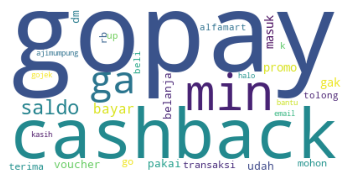

In [52]:
#Applying the Wordcloud
wordcloud=WordCloud(collocations= False,background_color='white', stopwords=stopword, max_words=30, max_font_size=200,random_state=1).generate(word)
print(wordcloud)
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
#Save the wordcloud
fig.savefig("wordcloud gopay.png", dpi=900)

## TF IDF

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
vectorizer=CountVectorizer(min_df=0.02)
x=vectorizer.fit_transform(data_stop)
DTM=pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names())
DTM['kalimat tweet']=data_stop
DTM['sum_features']=DTM.sum(axis=1)
DTM=DTM.loc[DTM['sum_features'] !=0].drop(['sum_features'],axis=1)
DTM.to_csv('DTM_tweet.csv')

In [56]:
DTM

,ajimumpung,akun,alfamart,aplikasi,banget,bantu,bayar,belanja,beli,blm,...,tolong,top,transaksi,tunggu,udah,udh,up,via,voucher,kalimat tweet
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kuno banget narik dana x jam kayak jaman batu
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,dm tolong bantu donk min
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,tolong min dana x jam masuk rekening tari sald...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,maximum topup saldo gopay min
6,0,1,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,nanya utk belanja alfamart gopay akun blm prnh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ngasih promo jujur kode ga dipake layar kasir ...
1176,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,promo sih cashback tau gin gua belanja
1178,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tiket sya device dhitung device merchant fine ...
1180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,wes mention seko jam tetep ra respon wqwq gima...


In [57]:
#tf idf is weighting every word with formula
vectorizer=TfidfVectorizer(min_df=0.02)
y=vectorizer.fit_transform(data_stop)
TFIDF=pd.DataFrame(y.toarray(),columns=vectorizer.get_feature_names())
TFIDF['kalimat tweet']=data_stop
TFIDF['sum_features']=TFIDF.sum(axis=1)
TFIDF=TFIDF.loc[TFIDF['sum_features'] !=0].drop(['sum_features'],axis=1)
TFIDF.to_csv('TFIDF_tweet.csv')

In [58]:
TFIDF

,ajimumpung,akun,alfamart,aplikasi,banget,bantu,bayar,belanja,beli,blm,...,tolong,top,transaksi,tunggu,udah,udh,up,via,voucher,kalimat tweet
1,0.0,0.000000,0.000000,0.0,0.729691,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,kuno banget narik dana x jam kayak jaman batu
2,0.0,0.000000,0.000000,0.0,0.000000,0.557088,0.0,0.000000,0.0,0.000000,...,0.546151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dm tolong bantu donk min
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.440272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tolong min dana x jam masuk rekening tari sald...
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,maximum topup saldo gopay min
6,0.0,0.368430,0.675493,0.0,0.000000,0.000000,0.0,0.316732,0.0,0.370793,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nanya utk belanja alfamart gopay akun blm prnh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0.0,0.000000,0.349531,0.0,0.397147,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ngasih promo jujur kode ga dipake layar kasir ...
1176,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.429725,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,promo sih cashback tau gin gua belanja
1178,0.0,0.541243,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tiket sya device dhitung device merchant fine ...
1180,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wes mention seko jam tetep ra respon wqwq gima...
